# This notebook is used to explore differences in the `CLSim`-based simulation arrising from using `GEANT` or not

In order to run this, you have to have run the scripts in `../scripts/0_injection/`, `../scripts/1_ppc_prop/`, `../scripts/2_clsim_prop/`, and `../scripts/3_clsim_mcpe/`. If you do not want to run these scripts yourself, a potentially incomplete selection of files can be found by changin the `DATADIR` variable to `/data/user/jlazar/upgrade_simulation_check/`. Let me know if you experience any issues.

In [64]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [65]:
import sys
sys.path.append("..")
from upgrade_simulation_check.mcpe_variables import get_count_vars, count_hits_per_module
from upgrade_simulation_check.utils import is_gen1, is_upgrade, is_ref_degg
from plot_helpers import plot_nmcpe, plot_nmodules, nmcpe_histogram_ratio, nmodule_histogram_ratio

In [81]:
from icecube import simclasses, dataclasses
from matplotlib import colors
from scipy.stats import ks_2samp
from matplotlib.gridspec import GridSpec


In [67]:
DATADIR = "../data/"

In [68]:
energy = 6 # GeV
offset = 8 # m
desc = f"11_{energy}_p{offset}p0p0"

file1 = f"{DATADIR}/clsim_mcpe/upgrade_checks_clsim_mcpe_{desc}.i3.zst"
file2 = f"{DATADIR}/ppc_photons/upgrade_checks_ppc_photons_{desc}.i3.zst"

In [71]:
nmcpe1, nmodule1 = get_count_vars(file1)
nmcpe2, nmodule2 = get_count_vars(file2)

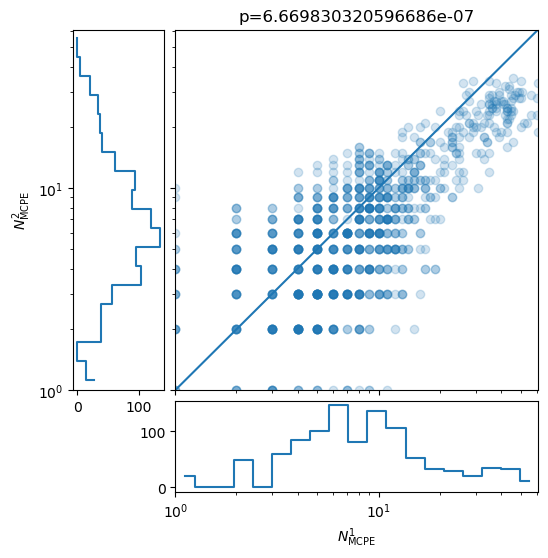

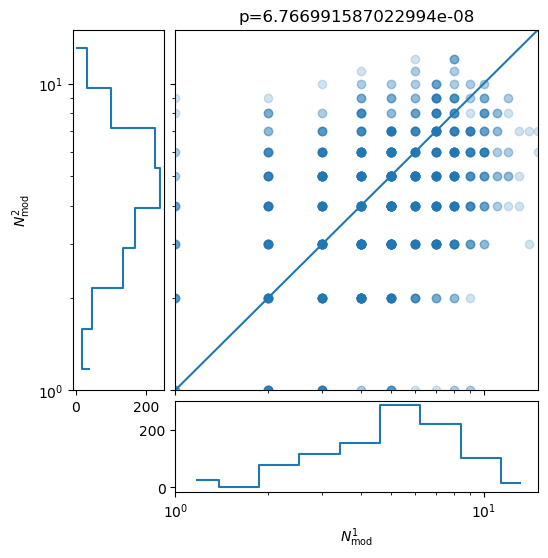

In [72]:
plot_nmcpe(nmcpe1, nmcpe2)
plot_nmodules(nmodule1, nmodule2)

In [73]:
nmcpe1, nmodule1 = get_count_vars(file1, filter=is_gen1)
nmcpe2, nmodule2 = get_count_vars(file2, filter=is_gen1)

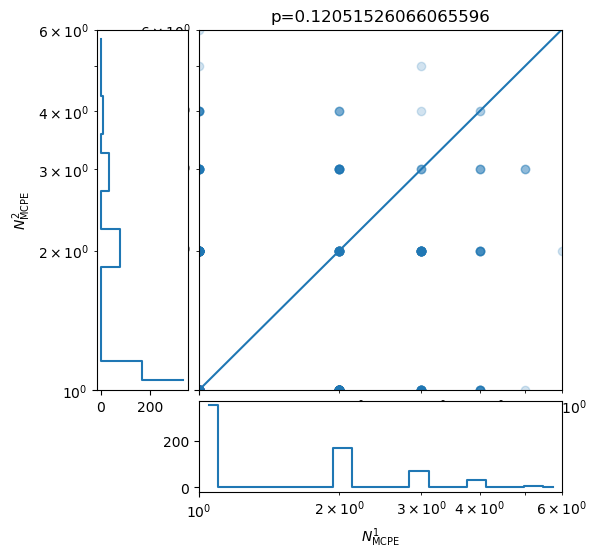

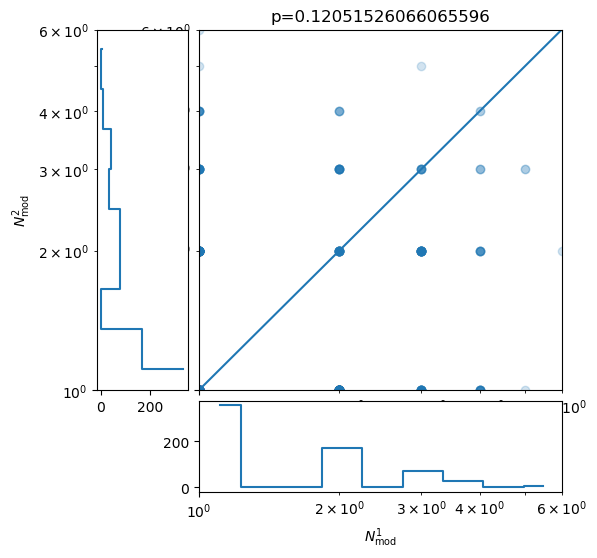

In [74]:
plot_nmcpe(nmcpe1, nmcpe2)
plot_nmodules(nmodule1, nmodule2)

In [75]:
nmcpe1, nmodule1 = get_count_vars(file1, filter=is_upgrade)
nmcpe2, nmodule2 = get_count_vars(file2, filter=is_upgrade)

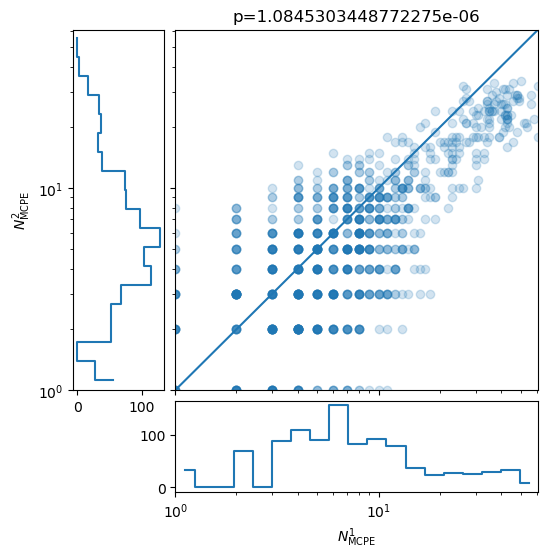

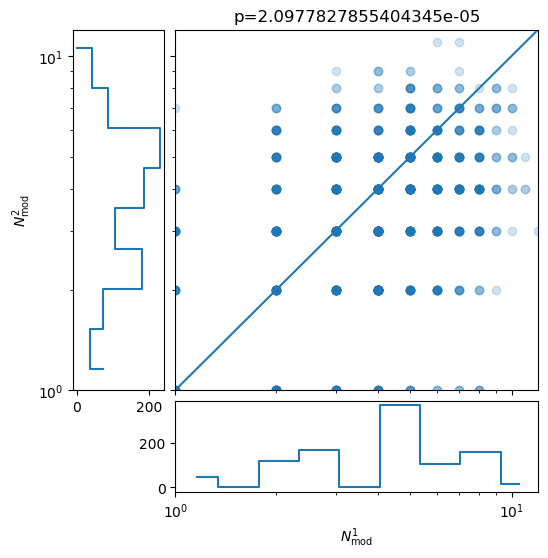

In [76]:
plot_nmcpe(nmcpe1, nmcpe2)
plot_nmodules(nmodule1, nmodule2)

In [77]:
nmcpe1, nmodule1 = get_count_vars(file1, filter=is_ref_degg)
nmcpe2, nmodule2 = get_count_vars(file2, filter=is_ref_degg)

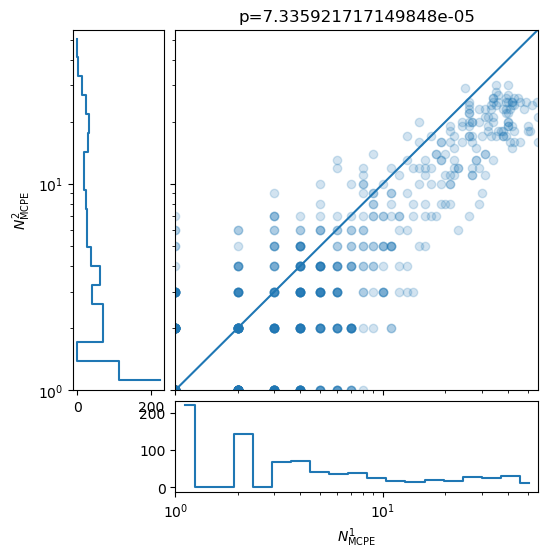

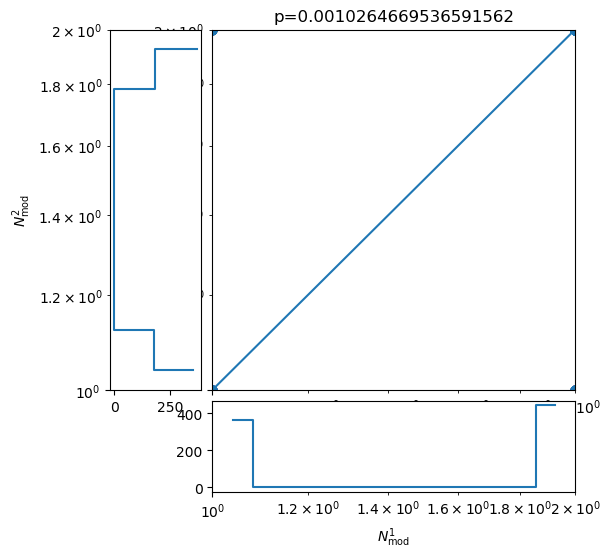

In [78]:
plot_nmcpe(nmcpe1, nmcpe2)
plot_nmodules(nmodule1, nmodule2)

In [59]:
cmap_mcpe = plt.get_cmap("Purples_r")
cmap_module = plt.get_cmap("Oranges_r")

bounds = np.linspace(-6, 0, 13)
norm = colors.BoundaryNorm(bounds, cmap_mcpe.N)

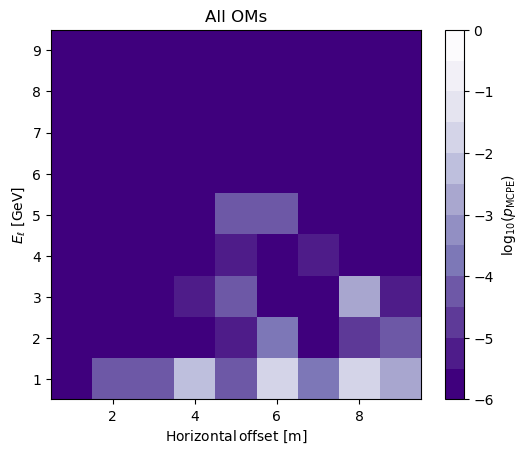

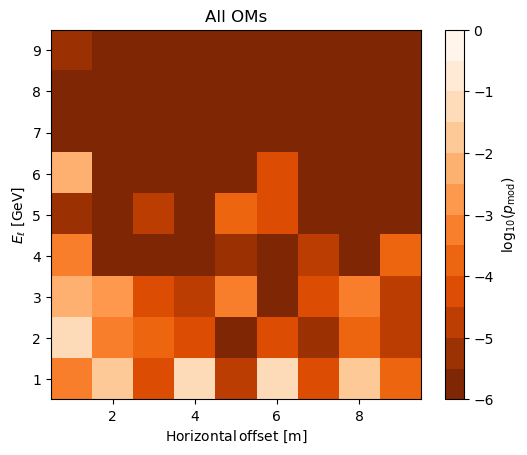

In [60]:
res = np.full((2, 9, 9), np.nan)
for idx, energy in enumerate(np.linspace(1, 9, 9, dtype=int)):
    for jdx, offset in enumerate(np.linspace(1, 9, 9, dtype=int)):
        # if offset not in [5] and energy not in [6]:
            # continue
        desc = f"11_{energy}_p{offset}p0p0"
        file1 = f"{DATADIR}/clsim_mcpe/upgrade_checks_clsim_mcpe_{desc}.i3.zst"
        file2 = f"{DATADIR}/ppc_photons/upgrade_checks_ppc_photons_{desc}.i3.zst"
        try:
            nmcpe1, nmodule1 = get_count_vars(file1)
            nmcpe2, nmodule2 = get_count_vars(file2)
        except RuntimeError:
            continue

        test = ks_2samp(nmcpe1, nmcpe2)
        res[0, idx, jdx] = test.pvalue
        test = ks_2samp(nmodule1, nmodule2)
        res[1, idx, jdx] = test.pvalue

#==== MCPE figure ====#
fig, ax = plt.subplots()
im = ax.imshow(
    np.log10(res[0,:,:][::-1]),
    extent=[0.5, 9.5, 0.5, 9.5],
    cmap=cmap_mcpe,
    norm=norm
    # vmin=-6,
    # vmax=0
)

ax.set_xlabel(r"$\mathrm{Horizontal\, offset}~\left[\mathrm{m}\right]$")
ax.set_ylabel(r"$E_{\ell}~\left[\mathrm{GeV}\right]$")

ax.set_title("All OMs")

cbar = plt.colorbar(im, label=r"$\log_{10}\left(p_{\mathrm{MCPE}}\right)$")
plt.show()

#==== Module figure ====#
fig, ax = plt.subplots()
im = ax.imshow(
    np.log10(res[1,:,:][::-1]),
    extent=[0.5, 9.5, 0.5, 9.5],
    cmap=cmap_module,
    norm=norm
    # vmin=-6,
    # vmax=0
)

ax.set_xlabel(r"$\mathrm{Horizontal\, offset}~\left[\mathrm{m}\right]$")
ax.set_ylabel(r"$E_{\ell}~\left[\mathrm{GeV}\right]$")

ax.set_title("All OMs")

cbar = plt.colorbar(im, label=r"$\log_{10}\left(p_{\mathrm{mod}}\right)$")
plt.show()

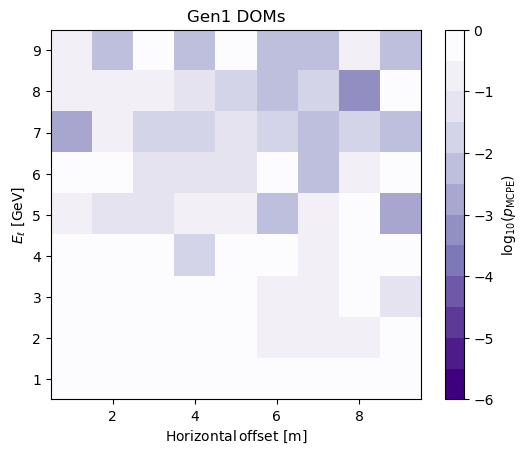

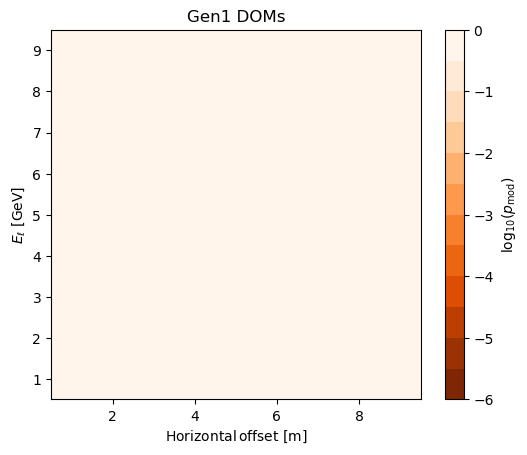

In [61]:
res = np.full((2, 9, 9), np.nan)
for idx, energy in enumerate(np.linspace(1, 9, 9, dtype=int)):
    for jdx, offset in enumerate(np.linspace(1, 9, 9, dtype=int)):
        desc = f"11_{energy}_p{offset}p0p0"
        file1 = f"{DATADIR}/clsim_mcpe/upgrade_checks_clsim_mcpe_{desc}.i3.zst"
        file2 = f"{DATADIR}/ppc_photons/upgrade_checks_ppc_photons_{desc}.i3.zst"

        try:
            nmcpe1, nmodule1 = get_count_vars(file1, filter=is_gen1)
            nmcpe2, nmodule2 = get_count_vars(file2, filter=is_gen1)
        except RuntimeError:
            continue
        
        test = ks_2samp(nmcpe1, nmcpe2)
        res[0, idx, jdx] = test.pvalue
        test = ks_2samp(nmodule1, nmodule2)
        res[1, idx, jdx] = test.pvalue

#==== MCPE figure ====#
fig, ax = plt.subplots()
im = ax.imshow(
    np.log10(res[0,:,:][::-1]),
    extent=[0.5, 9.5, 0.5, 9.5],
    cmap=cmap_mcpe,
    norm=norm
    # vmin=-6,
    # vmax=0
)

ax.set_xlabel(r"$\mathrm{Horizontal\, offset}~\left[\mathrm{m}\right]$")
ax.set_ylabel(r"$E_{\ell}~\left[\mathrm{GeV}\right]$")

ax.set_title("Gen1 DOMs")


cbar = plt.colorbar(im, label=r"$\log_{10}\left(p_{\mathrm{MCPE}}\right)$")
plt.show()

#==== Module figure ====#
fig, ax = plt.subplots()
im = ax.imshow(
    res[1,:,:][::-1],
    extent=[0.5, 9.5, 0.5, 9.5],
    cmap=cmap_module,
    norm=norm
    # vmin=-6,
    # vmax=0
)

ax.set_xlabel(r"$\mathrm{Horizontal\, offset}~\left[\mathrm{m}\right]$")
ax.set_ylabel(r"$E_{\ell}~\left[\mathrm{GeV}\right]$")

ax.set_title("Gen1 DOMs")


cbar = plt.colorbar(im, label=r"$\log_{10}\left(p_{\mathrm{mod}}\right)$")
plt.show()

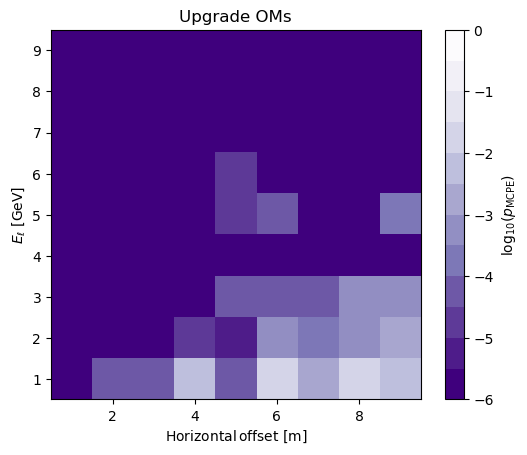

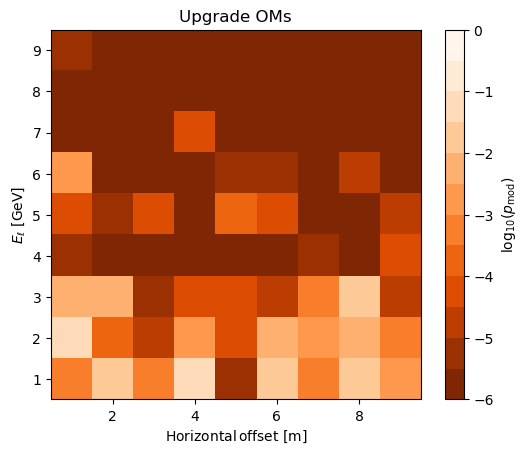

In [62]:
res = np.full((2, 9, 9), np.nan)
for idx, energy in enumerate(np.linspace(1, 9, 9, dtype=int)):
    for jdx, offset in enumerate(np.linspace(1, 9, 9, dtype=int)):
        desc = f"11_{energy}_p{offset}p0p0"
        file1 = f"{DATADIR}/clsim_mcpe/upgrade_checks_clsim_mcpe_{desc}.i3.zst"
        file2 = f"{DATADIR}/ppc_photons/upgrade_checks_ppc_photons_{desc}.i3.zst"

        # try:
        nmcpe1, nmodule1 = get_count_vars(file1, filter=is_upgrade)
        nmcpe2, nmodule2 = get_count_vars(file2, filter=is_upgrade)
        # except RuntimeError:
        #     continue
        
        test = ks_2samp(nmcpe1, nmcpe2)
        res[0, idx, jdx] = test.pvalue
        test = ks_2samp(nmodule1, nmodule2)
        res[1, idx, jdx] = test.pvalue

#==== MCPE figure ====#
fig, ax = plt.subplots()
im = ax.imshow(
    np.log10(res[0,:,:][::-1]),
    extent=[0.5, 9.5, 0.5, 9.5],
    cmap=cmap_mcpe,
    norm=norm
    # vmin=-6,
    # vmax=0
)

ax.set_xlabel(r"$\mathrm{Horizontal\, offset}~\left[\mathrm{m}\right]$")
ax.set_ylabel(r"$E_{\ell}~\left[\mathrm{GeV}\right]$")

ax.set_title("Upgrade OMs")

cbar = plt.colorbar(im, label=r"$\log_{10}\left(p_{\mathrm{MCPE}}\right)$")

plt.show()

#==== Module figure ====#
fig, ax = plt.subplots()
im = ax.imshow(
    # res[1,:,:][::-1],
    np.log10(res[1,:,:][::-1]),
    extent=[0.5, 9.5, 0.5, 9.5],
    cmap=cmap_module,
    norm=norm
)

ax.set_xlabel(r"$\mathrm{Horizontal\, offset}~\left[\mathrm{m}\right]$")
ax.set_ylabel(r"$E_{\ell}~\left[\mathrm{GeV}\right]$")

ax.set_title("Upgrade OMs")

cbar = plt.colorbar(im, label=r"$\log_{10}\left(p_{\mathrm{mod}}\right)$")

plt.show()

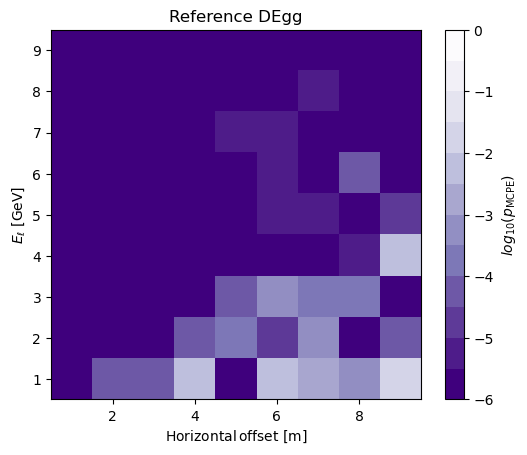

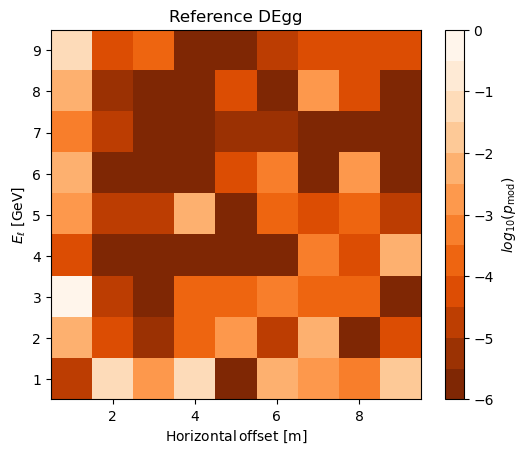

In [63]:
res = np.full((2, 9, 9), np.nan)
for idx, energy in enumerate(np.linspace(1, 9, 9, dtype=int)):
    for jdx, offset in enumerate(np.linspace(1, 9, 9, dtype=int)):
        desc = f"11_{energy}_p{offset}p0p0"
        file1 = f"{DATADIR}/clsim_mcpe/upgrade_checks_clsim_mcpe_{desc}.i3.zst"
        file2 = f"{DATADIR}/ppc_photons/upgrade_checks_ppc_photons_{desc}.i3.zst"

        try:
            nmcpe1, nmodule1 = get_count_vars(file1, filter=is_ref_degg)
            nmcpe2, nmodule2 = get_count_vars(file2, filter=is_ref_degg)
        except RuntimeError:
            continue
        
        test = ks_2samp(nmcpe1, nmcpe2)
        res[0, idx, jdx] = test.pvalue
        test = ks_2samp(nmodule1, nmodule2)
        res[1, idx, jdx] = test.pvalue

#==== MCPE figure ====#
fig, ax = plt.subplots()
im = ax.imshow(
    np.log10(res[0,:,:][::-1]),
    extent=[0.5, 9.5, 0.5, 9.5],
    cmap=cmap_mcpe,
    norm=norm
    # vmin=-6,
    # vmax=0
)

ax.set_xlabel(r"$\mathrm{Horizontal\, offset}~\left[\mathrm{m}\right]$")
ax.set_ylabel(r"$E_{\ell}~\left[\mathrm{GeV}\right]$")

ax.set_title("Reference DEgg")

cbar = plt.colorbar(im, label=r"$log_{10}\left(p_{\mathrm{MCPE}}\right)$")

plt.show()

#==== Module figure ====#
fig, ax = plt.subplots()
im = ax.imshow(
    np.log10(res[1,:,:][::-1]),
    extent=[0.5, 9.5, 0.5, 9.5],
    cmap=cmap_module,
    norm=norm
    # vmin=-6,
    # vmax=0
)

ax.set_xlabel(r"$\mathrm{Horizontal\, offset}~\left[\mathrm{m}\right]$")
ax.set_ylabel(r"$E_{\ell}~\left[\mathrm{GeV}\right]$")

ax.set_title("Reference DEgg")

cbar = plt.colorbar(im, label=r"$log_{10}\left(p_{\mathrm{mod}}\right)$")

plt.show()

In [79]:
d1 = count_hits_per_module(file1, neventmin=50)
d2 = count_hits_per_module(file2, neventmin=50)

oms = list(set(list(d1.keys()) + list(d2.keys())))
oms = sorted(oms, key=lambda om: -(len(d1.get(om, [])) + len(d2.get(om, []))))

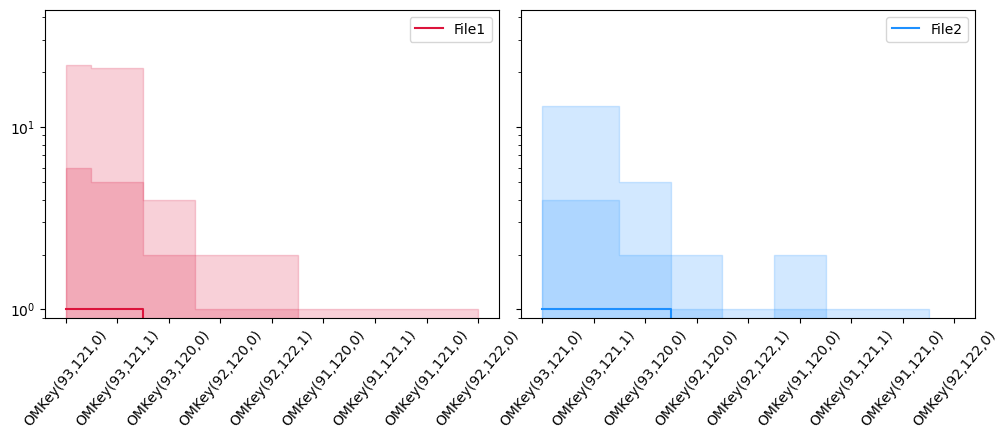

In [82]:
quantiles = [0.025, 0.16, 0.5, 0.84, 0.975]
res = np.empty((2, len(oms), len(quantiles)))

for idx, om in enumerate(oms):
    nmod = np.zeros(1000)
    if om in d1:
        nmod[:len(d1[om])] = d1[om]
    res[0, idx, :] = np.quantile(nmod, quantiles)
    
    nmod = np.zeros(1000)
    if om in d2:
        nmod[:len(d2[om])] = d2[om]
    res[1, idx, :] = np.quantile(nmod, quantiles)
    

fakex = np.linspace(1, len(oms), len(oms))

fig = plt.figure(figsize=(12, 4))
gs = GridSpec(
    1, 2,
    wspace=0.05, hspace=0.05
)

ax0 = fig.add_subplot(gs[0])
ax1 = fig.add_subplot(gs[1])

ax0.step(fakex, res[0, :, 2], label="File1", where="mid", color="crimson")
ax1.step(fakex, res[1, :, 2], label="File2", where="mid", color="dodgerblue")

ax0.fill_between(fakex, res[0, :, 1], res[0, :, 3], color="crimson", alpha=0.2, step="mid")
ax1.fill_between(fakex, res[1, :, 1], res[1, :, 3], color="dodgerblue", alpha=0.2, step="mid")
ax0.fill_between(fakex, res[0, :, 0]*1.15, res[0, :, 4], color="crimson", alpha=0.2, step="mid")
ax1.fill_between(fakex, res[1, :, 0], res[1, :, 4], color="dodgerblue", alpha=0.2, step="mid")

ax0.set_ylim(0.9, res.max()*2)
ax1.set_ylim(0.9, res.max()*2)

ax0.semilogy()
ax1.semilogy()

ax0.set_xticks(fakex)
ax0.set_xticklabels(oms, rotation=50)
ax1.set_xticks(fakex)
ax1.set_xticklabels(oms, rotation=50)

ax1.set_yticklabels([])

ax0.legend()
ax1.legend()

plt.show()


In [79]:
from icecube import dataio, dataclasses
from icecube.icetray import I3Module

In [105]:
i3f = dataio.I3File("/data/sim/IceCubeUpgrade/geometries/GCDs/GeoCalibDetectorStatus_ICUpgrade.v58.mixed.V1.i3.bz2")
_ = i3f.pop_frame()
cal = i3f.pop_frame()
i3f.close()

In [107]:
cal.keys()

['BedrockZ',
 'EndTime',
 'I3OMGeoMap',
 'StartTime',
 'DepthAtZ0',
 'I3ExtraModuleGeoMap',
 'I3Geometry',
 'I3ModuleGeoMap',
 'Subdetectors',
 'I3Calibration',
 'SPEAbove',
 'I3StationGeoMap',
 'SPEScalingFactors']

In [112]:
for k, v in cal["I3OMGeoMap"].items():
    if k.string==93 and k.om>=121:
        print(k)
        print(v)
        print(cal["I3Calibration"].dom_cal[k])
        


OMKey(93,121,0)
[I3OMGeo Position: I3Position(14.29,-80.5637,-602.177)
      Orientation: I3Orientation: 
    Dir: (0,-0,-1)
     Up: (1,0,-0)
  Right: (0,-1,0)
           OMType: 120
             Area: 0.0324293 ]
[ I3DOMCalibration  :: 
       TauParameters : [ TauParam :: 
         P0 : 10960
         P1 : 56665
         P2 : 6.5
         P3 : 500
         P4 : 0
         P5 : 1
    TauFrac : -0.5
]
         Temperature : 257.9
            FADCGain : 8.85497e-14
     FADCBaselineFit : [LinearFit slope(1.24855) intercept(-863.395)]
  FADCBeaconBaseline : 134.885
          FADCDeltaT : -113.505
   FrontEndImpedance : 8.01088e-18
         ATWDGain[0] : -15.5317
         ATWDGain[1] : -1.76259
         ATWDGain[2] : -0.202637
      ATWDFreqFit[0] : [QuadraticFit a(38.1142) b(0.353033) c(-2.99599e-05)]
      ATWDFreqFit[1] : [QuadraticFit a(39.2509) b(0.345786) c(-3.02171e-05)]
         TransitTime : [LinearFit slope(1914.93) intercept(89.226)]
           HVGainFit : [LinearFit slope(7.4

In [108]:

x = cal["I3Calibration"]

In [103]:
for k, v in cal["SPEScalingFactors"].items():
    if k.string==93:
            print(k)
            print(v)

In [110]:
x.dom_cal